# **Problem 1**:

# Task 1<br> 
Get the Data from this <a href="https://archive.ics.uci.edu/ml/datasets/Automobile">link</a> and perform Exploratory Dataset Analysis on the same. You must tackle all the missing values present and also visualise the data as much as you can by plotting various plots,heatmaps,correlation matrix etc. You should present atleat five informational insights which you were able to grab from the data. Your notebook should be presented in a well-defined manner.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

import scipy.stats

In [2]:
data = pd.read_csv('Data/imports-85.data', sep=",", header=0)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

data.columns = ['Symboling','Normalized-Losses','Make','Fuel-Type','Aspiration','Door-Count','Body-Style','Drive-Wheels',
               'Engine-Location','Wheel-Base','Length','Width','Height','Curb-Weight','Engine-Type','Cylinder-Count',
                'Engine-Size','Fuel-system','Bore','Stroke','Compression-Ratio','Horsepower','Peak-RPM','City-MPG','Highway-MPG',
                'Price']

data

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Door-Count,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Cylinder-Count,Engine-Size,Fuel-system,Bore,Stroke,Compression-Ratio,Horsepower,Peak-RPM,City-MPG,Highway-MPG,Price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
6,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
8,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16430


In [3]:
data.dtypes

Symboling              int64
Normalized-Losses     object
Make                  object
Fuel-Type             object
Aspiration            object
Door-Count            object
Body-Style            object
Drive-Wheels          object
Engine-Location       object
Wheel-Base           float64
Length               float64
Width                float64
Height               float64
Curb-Weight            int64
Engine-Type           object
Cylinder-Count        object
Engine-Size            int64
Fuel-system           object
Bore                  object
Stroke                object
Compression-Ratio    float64
Horsepower            object
Peak-RPM              object
City-MPG               int64
Highway-MPG            int64
Price                 object
dtype: object

Seems like most data needs a hange in datatype

# Missing Data

In [4]:
(data['Normalized-Losses'].eq('?')).sum()

40

In [5]:
def find_missing_percent(data):
    
    miss_df = pd.DataFrame({'ColumnName':[],'TotalMissingVals':[],'PercentMissing':[]})
    for col in data.columns:
        sum_miss_val = (data[col]==('?')).sum()
        percent_miss_val = round((sum_miss_val/data.shape[0])*100,2)
        if (sum_miss_val != 0):
            miss_df = miss_df.append(dict(zip(miss_df.columns,[col,sum_miss_val,percent_miss_val])),ignore_index=True)
    return miss_df

miss_data = find_missing_percent(data)
print(f"Number of columns with missing values: {str(miss_data[miss_data['PercentMissing']>0.0].shape[0])}")

display(miss_data)

Number of columns with missing values: 7


,ColumnName,TotalMissingVals,PercentMissing
0,Normalized-Losses,40.0,19.61
1,Door-Count,2.0,0.98
2,Bore,4.0,1.96
3,Stroke,4.0,1.96
4,Horsepower,2.0,0.98
5,Peak-RPM,2.0,0.98
6,Price,4.0,1.96


We can see that most columns have very few missing cells, except for 'Normalized-Losses'<br>

First convert '?' to NaN datatype <br>
Then change datatype of all the coulumns that are numeric but right now stored as 'object' and also perform hot encoding

In [6]:
data = data.replace(['?'], np.nan)

In [7]:
def find_missing_percent(data):
    
    miss_df = pd.DataFrame({'ColumnName':[],'TotalMissingVals':[],'PercentMissing':[]})
    for col in data.columns:
        sum_miss_val = data[col].isnull().sum()
        percent_miss_val = round((sum_miss_val/data.shape[0])*100,2)
        if (sum_miss_val != 0):
            miss_df = miss_df.append(dict(zip(miss_df.columns,[col,sum_miss_val,percent_miss_val])),ignore_index=True)
    return miss_df

miss_data = find_missing_percent(data)
print(f"Number of columns with missing values: {str(miss_data[miss_data['PercentMissing']>0.0].shape[0])}")

display(miss_data)

Number of columns with missing values: 7


,ColumnName,TotalMissingVals,PercentMissing
0,Normalized-Losses,40.0,19.61
1,Door-Count,2.0,0.98
2,Bore,4.0,1.96
3,Stroke,4.0,1.96
4,Horsepower,2.0,0.98
5,Peak-RPM,2.0,0.98
6,Price,4.0,1.96


In [8]:
data[data.isna().any(axis=1)]

,Symboling,Normalized-Losses,Make,Fuel-Type,Aspiration,Door-Count,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-Type,Cylinder-Count,Engine-Size,Fuel-system,Bore,Stroke,Compression-Ratio,Horsepower,Peak-RPM,City-MPG,Highway-MPG,Price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN
13,1,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3055,ohc,six,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
14,0,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
15,0,NaN,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
16,0,NaN,bmw,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880
26,1,148,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558


 No particular row worth dropping

Analysing every column 

Case: Where integers are stored as object and have NaN values which is to be filled with Median

In [9]:
columns = ['Normalized-Losses']

for col in columns:
    print(data[col].describe())

    col_types = list(set(data[col]))
    print()
    print("The list of unique values")
    print(col_types)
    
    data[col] = pd.to_numeric(data[col], errors='coerce')

    data[col] = data[col].fillna(data[col].mean())
    
    print(data[col].describe())

count     164
unique     51
top       161
freq       11
Name: Normalized-Losses, dtype: object

The list of unique values
[nan, '118', '106', '94', '145', '142', '231', '104', '113', '154', '74', '85', '119', '256', '93', '153', '161', '168', '108', '65', '158', '150', '197', '98', '101', '81', '186', '137', '103', '90', '192', '78', '134', '110', '188', '77', '125', '102', '121', '89', '107', '91', '115', '148', '129', '95', '164', '194', '83', '122', '128', '87']
count    204.000000
mean     122.000000
std       31.758944
min       65.000000
25%      101.000000
50%      122.000000
75%      137.000000
max      256.000000
Name: Normalized-Losses, dtype: float64


Case: When Label Encoding is required

In [10]:
columns = ['Fuel-Type','Aspiration','Engine-Location']

for col in columns:
    print(data[col].describe())
    print()
    
    col_types = list(set(data[col]))
    print("The list of unique values")
    print(col_types)
    
    from sklearn.preprocessing import LabelEncoder

    labelencoder = LabelEncoder()
    data[col] = labelencoder.fit_transform(data[col])

count     204
unique      2
top       gas
freq      184
Name: Fuel-Type, dtype: object

The list of unique values
['diesel', 'gas']
count     204
unique      2
top       std
freq      167
Name: Aspiration, dtype: object

The list of unique values
['std', 'turbo']
count       204
unique        2
top       front
freq        201
Name: Engine-Location, dtype: object

The list of unique values
['rear', 'front']


In [11]:
col = 'Door-Count'

In [12]:
print(data[col].describe())
print()
    
col_types = list(set(data[col]))
print("The list of unique values")
print(col_types)

count      202
unique       2
top       four
freq       114
Name: Door-Count, dtype: object

The list of unique values
[nan, 'two', 'four']


Can try string to numeric conversion and also fill NaN values with Median while we are at it

In [13]:
data[col] = data[col].replace(['four'], 4)
data[col] = data[col].replace(['two'], 2)

In [14]:
data[col] = data[col].fillna(data[col].median())

In [15]:
print(data[col].describe())

z = tuple(set(data[col]))
print("The list of unique values")
print(z)

count    204.000000
mean       3.137255
std        0.992973
min        2.000000
25%        2.000000
50%        4.000000
75%        4.000000
max        4.000000
Name: Door-Count, dtype: float64
The list of unique values
(2.0, 4.0)


In [16]:
col = 'Drive-Wheels'

In [17]:
print(data[col].describe())

z = tuple(set(data[col]))
print("The list of unique values")
print(z)

count     204
unique      3
top       fwd
freq      120
Name: Drive-Wheels, dtype: object
The list of unique values
('4wd', 'fwd', 'rwd')


'4wd' to be replaced with 'fwd' and then Label Encoding

In [18]:
data[col] = data[col].replace(['4wd'], 'fwd')

In [19]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

data[col] = labelencoder.fit_transform(data[col])

In [20]:
col = 'Cylinder-Count'

In [21]:
print(data[col].describe())

z = tuple(set(data[col]))
print("The list of unique values")
print(z)

count      204
unique       7
top       four
freq       158
Name: Cylinder-Count, dtype: object
The list of unique values
('six', 'twelve', 'five', 'four', 'eight', 'two', 'three')


Just needs labelling

In [22]:
data[col] = data[col].replace(['four'], 4)
data[col] = data[col].replace(['two'], 2)
data[col] = data[col].replace(['eight'], 8)
data[col] = data[col].replace(['six'], 6)
data[col] = data[col].replace(['twelve'], 12)
data[col] = data[col].replace(['three'], 3)
data[col] = data[col].replace(['five'], 5)

In [23]:
print(data[col].describe())

count    204.000000
mean       4.382353
std        1.083182
min        2.000000
25%        4.000000
50%        4.000000
75%        4.000000
max       12.000000
Name: Cylinder-Count, dtype: float64


Case: Convert datatype to int and then Fill NaN with mean

In [24]:
columns = ['Bore','Stroke']

for col in columns:
    print(data[col].describe())
    print()
    
    col_types = list(set(data[col]))
    print("The list of unique values")
    print(col_types)
    
    data[col] = pd.to_numeric(data[col], errors='coerce')

    data[col] = data[col].fillna(data[col].mean())

count      200
unique      38
top       3.62
freq        23
Name: Bore, dtype: object

The list of unique values
['2.97', nan, '3.50', '3.05', '3.39', '3.17', '3.27', '3.01', '3.80', '3.54', '3.60', '3.43', '3.31', '3.78', '3.70', '3.58', '3.46', '3.74', '3.63', '3.62', '3.33', '3.24', '2.91', '3.19', '3.59', '3.34', '3.35', '2.99', '3.15', '3.08', '3.94', '3.03', '3.47', '3.61', '3.76', '2.92', '3.13', '2.68', '2.54']
count      200
unique      36
top       3.40
freq        20
Name: Stroke, dtype: object

The list of unique values
[nan, '3.29', '2.80', '3.50', '3.39', '3.10', '3.27', '2.76', '4.17', '3.54', '3.12', '2.19', '3.52', '3.58', '2.87', '3.46', '3.11', '3.86', '2.64', '3.41', '3.19', '3.64', '3.40', '2.36', '3.35', '3.90', '3.23', '2.07', '3.15', '3.21', '3.08', '3.03', '3.47', '3.07', '2.90', '2.68', '3.16']


Case: Convert datatype to int and then Fill NaN with median

In [25]:
columns = ['Horsepower','Peak-RPM','Price']

for col in columns:
    print(data[col].describe())
    print()
    
    col_types = list(set(data[col]))
    print("The list of unique values")
    print(col_types)
    
    data[col] = pd.to_numeric(data[col], errors='coerce' ,downcast="integer")

    data[col] = data[col].fillna(data[col].median())

count     202
unique     59
top        68
freq       19
Name: Horsepower, dtype: object

The list of unique values
['143', nan, '106', '207', '94', '145', '64', '92', '58', '70', '142', '262', '154', '88', '55', '200', '85', '114', '76', '86', '155', '161', '100', '288', '97', '82', '116', '101', '69', '175', '52', '176', '90', '182', '68', '140', '120', '56', '123', '78', '48', '134', '110', '112', '72', '111', '102', '156', '121', '73', '115', '152', '62', '95', '135', '84', '184', '162', '60', '160']
count      202
unique      23
top       5500
freq        37
Name: Peak-RPM, dtype: object

The list of unique values
[nan, '4750', '4150', '6600', '4350', '5200', '5900', '5600', '4250', '4650', '4800', '5100', '5300', '5250', '4400', '5750', '4200', '5000', '4500', '5500', '4900', '5800', '5400', '6000']
count      200
unique     185
top       8495
freq         2
Name: Price, dtype: object

The list of unique values
[nan, '14489', '10295', '19699', '12940', '8921', '8058', '12440', '81

In [26]:
data_numeric = data._get_numeric_data()

Case: When One-Hot Encoding is required (Done after extracting who are not hot encoded)<br>

In [27]:
columns = ['Make','Body-Style','Engine-Type','Fuel-system']

for col in columns:
    print(data[col].describe())

    col_types = list(set(data[col]))
    print()
    print("The list of unique values")
    print(col_types)

    dum_data_col = pd.get_dummies(data, columns=[col], prefix=[col+"_"] )

    data = data.merge(dum_data_col)

count        204
unique        22
top       toyota
freq          32
Name: Make, dtype: object

The list of unique values
['porsche', 'chevrolet', 'volkswagen', 'jaguar', 'alfa-romero', 'plymouth', 'mercury', 'volvo', 'isuzu', 'subaru', 'dodge', 'peugot', 'saab', 'nissan', 'audi', 'bmw', 'honda', 'renault', 'mercedes-benz', 'mitsubishi', 'mazda', 'toyota']
count       204
unique        5
top       sedan
freq         96
Name: Body-Style, dtype: object

The list of unique values
['hatchback', 'convertible', 'hardtop', 'wagon', 'sedan']
count     204
unique      7
top       ohc
freq      148
Name: Engine-Type, dtype: object

The list of unique values
['dohc', 'l', 'ohc', 'ohcf', 'rotor', 'dohcv', 'ohcv']
count      204
unique       8
top       mpfi
freq        93
Name: Fuel-system, dtype: object

The list of unique values
['2bbl', 'mpfi', 'spfi', 'idi', 'spdi', '1bbl', 'mfi', '4bbl']


In [28]:
data = data._get_numeric_data()

In [29]:
data_numeric.dtypes

Symboling              int64
Normalized-Losses    float64
Fuel-Type              int64
Aspiration             int64
Door-Count           float64
Drive-Wheels           int64
Engine-Location        int64
Wheel-Base           float64
Length               float64
Width                float64
Height               float64
Curb-Weight            int64
Cylinder-Count         int64
Engine-Size            int64
Bore                 float64
Stroke               float64
Compression-Ratio    float64
Horsepower           float64
Peak-RPM             float64
City-MPG               int64
Highway-MPG            int64
Price                float64
dtype: object

In [30]:
data_numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
Symboling,204.0,0.823529,1.239035,-2.00,0.000,1.00,2.0000,3.00
Normalized-Losses,204.0,122.000000,31.758944,65.00,101.000,122.00,137.0000,256.00
Fuel-Type,204.0,0.901961,0.298099,0.00,1.000,1.00,1.0000,1.00
Aspiration,204.0,0.181373,0.386274,0.00,0.000,0.00,0.0000,1.00
Door-Count,204.0,3.137255,0.992973,2.00,2.000,4.00,4.0000,4.00
Drive-Wheels,204.0,0.367647,0.483351,0.00,0.000,0.00,1.0000,1.00
Engine-Location,204.0,0.014706,0.120669,0.00,0.000,0.00,0.0000,1.00
Wheel-Base,204.0,98.806373,5.994144,86.60,94.500,97.00,102.4000,120.90
Length,204.0,174.075000,12.362123,141.10,166.300,173.20,183.2000,208.10
Width,204.0,65.916667,2.146716,60.30,64.075,65.50,66.9000,72.30


# Visualization of Data

**Correlation Matrix**

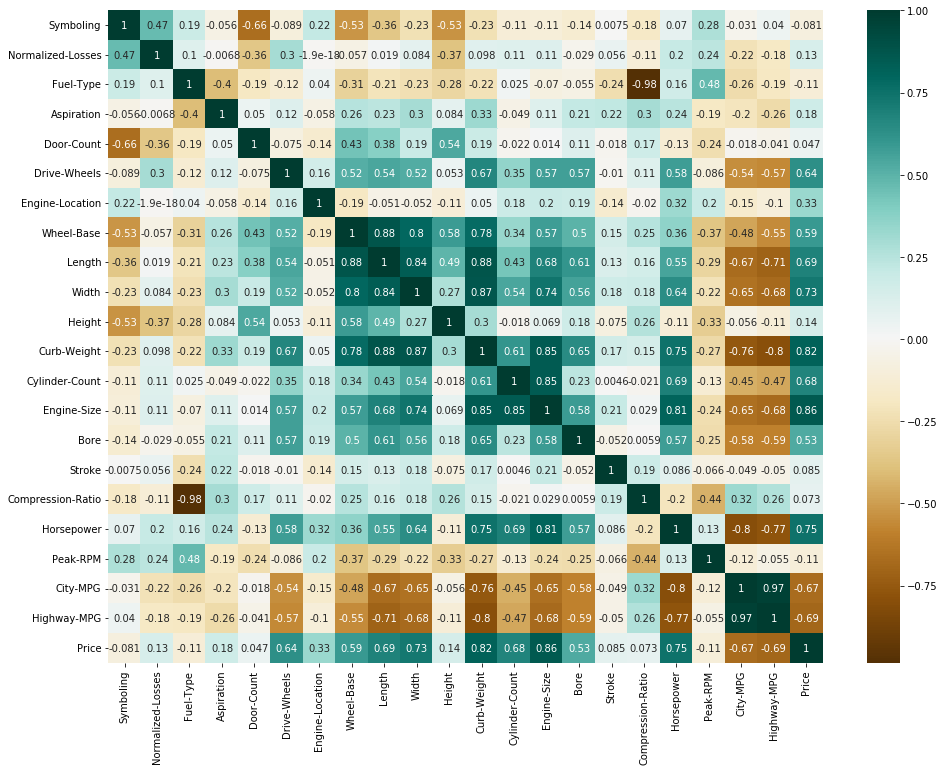

In [31]:
corr_matrix=data_numeric.corr()

plt.figure(1, figsize=(16,12))
sns.heatmap(corr_matrix, cmap='BrBG', annot=True)

In [32]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(data_numeric, 20))

Top Absolute Correlations
Fuel-Type       Compression-Ratio    0.984353
City-MPG        Highway-MPG          0.971311
Length          Curb-Weight          0.878090
Wheel-Base      Length               0.877612
Width           Curb-Weight          0.868493
Engine-Size     Price                0.860321
Curb-Weight     Engine-Size          0.850611
Cylinder-Count  Engine-Size          0.846429
Length          Width                0.841199
Curb-Weight     Price                0.819806
Engine-Size     Horsepower           0.810223
Horsepower      City-MPG             0.802502
Curb-Weight     Highway-MPG          0.798088
Wheel-Base      Width                0.795115
                Curb-Weight          0.781763
Horsepower      Highway-MPG          0.770937
Curb-Weight     City-MPG             0.758238
                Horsepower           0.750996
Horsepower      Price                0.749856
Width           Engine-Size          0.737042
dtype: float64


**Pair Plot**

In [33]:
#pair_plot = sns.pairplot(data_numeric, hue = 'Price')

**Histograms**

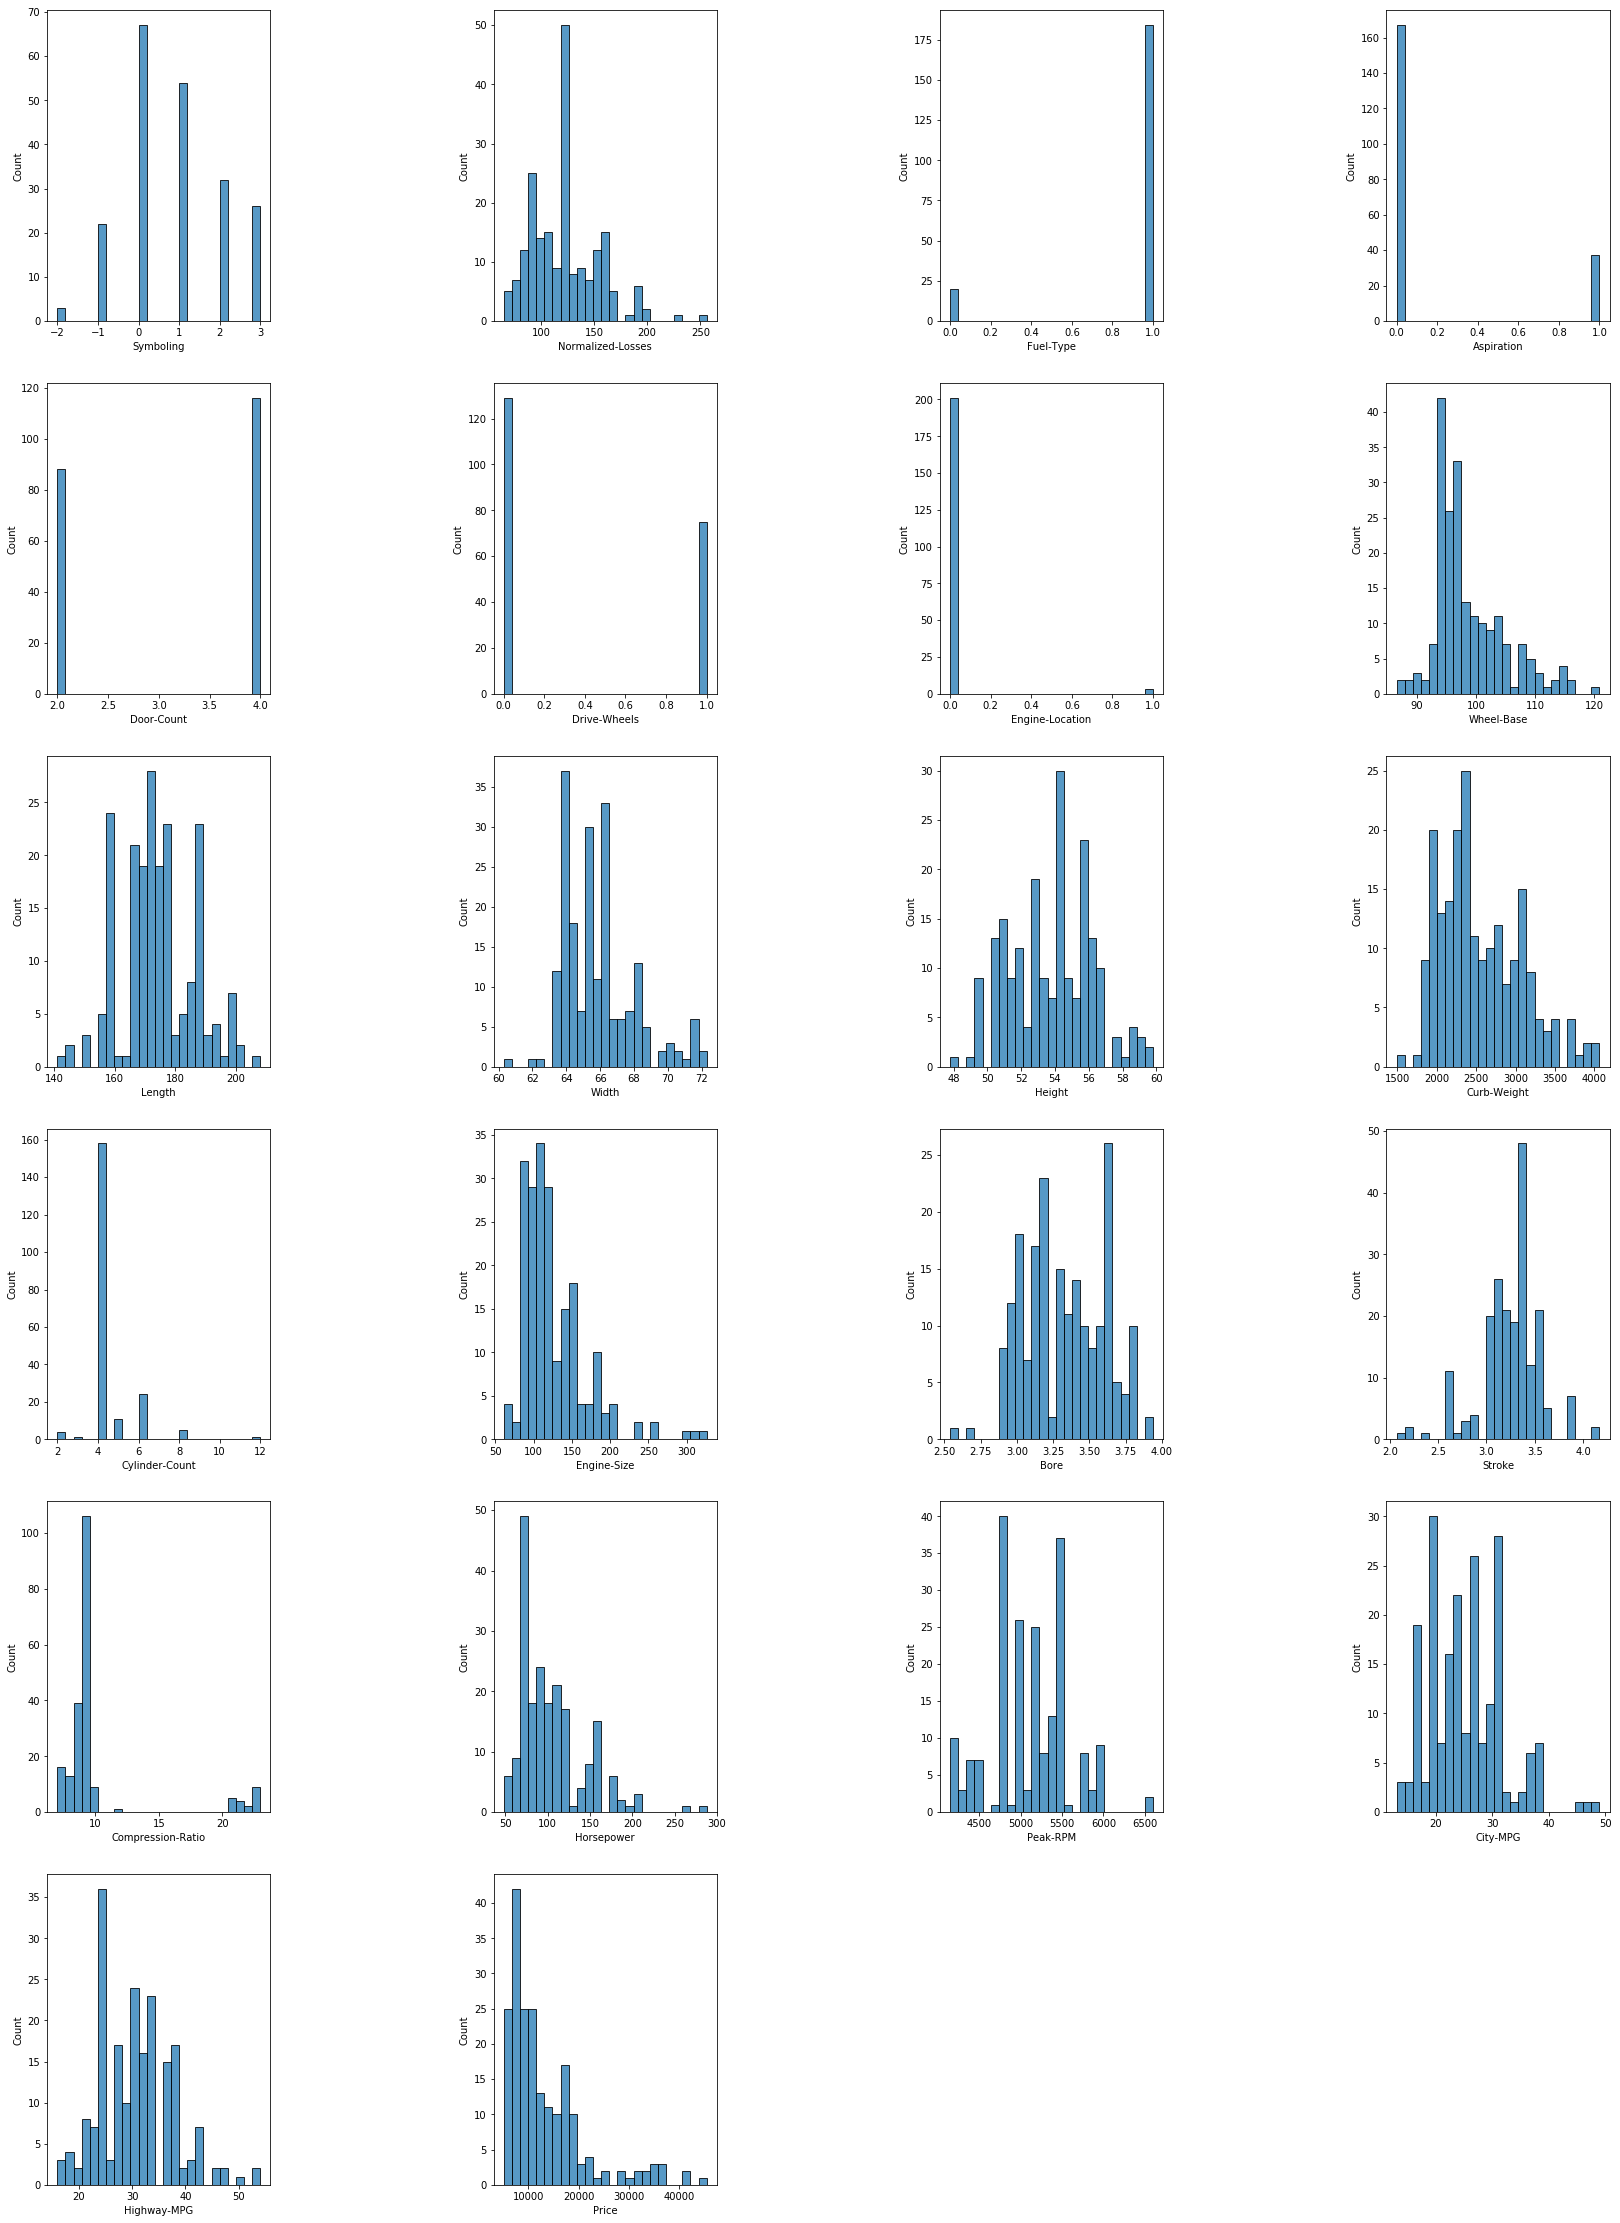

In [34]:
plt.figure(figsize=(28,40))
plt.subplots_adjust(wspace=1, hspace=None)

i = 1
for col_name in data_numeric.columns:
    plt.subplot(6, 4, i)
    sns.histplot(data = data[col_name],  bins = 25)
    i +=1

****

****

# Task 2 <br>
"Algorithms like K-nearest and Naive Bayes support data with missing values." <br>
Justify the above statement in your own words, you may skip Naive Bayes but KNN is a must.

In KNN the time complexity to train a model is O(1), basically we just the store the training data<br>
It is while prediction of a sample when it has O(n) time complexity where n is size of training data<br>
This naturally is a bad thing but in this case it a boon, if for a sample a particular feature is missing for particular test sample, then we can simply apply KNN(distance metric) on a model without that feature.<br>
Exactly same argument can be given for Naive Bayes, where while calculating the probability we can just ignore the problematic feature

****

****

# Task 3 <br>
Go through this cool Pokemon Dataset. Perform a detailed EDA on this Data and answer the following questions -<br>

1) How many Pokemon are in each Generation?<br>
2) Who is the most powerful pokemon ?<br>
3) In terms of dual types (Pokemon with 2 different types), What is the most common combination?<br>
4) Present the names of the Pokemons having Maximum and Minimum Feature Values corresponding to attack , defense , sp_attack , sp_defense , hp , speed and catch_rate.

In [35]:
df_0520 = pd.read_csv('Data/pokedex_(Update_05.20).csv', header=0)
df_0421 = pd.read_csv('Data/pokedex_(Update_04.21).csv', header=0)
df_0420 = pd.read_csv('Data/pokedex_(Update.04.20).csv', header=0)

In [36]:
print(df_0520.shape,df_0421.shape,df_0420.shape)

(1028, 51) (1045, 51) (1028, 53)


In [37]:
df_0520.tail()

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
1023,1023,888,Zacian Hero of Many Battles,NaN,NaN,8,Legendary,Warrior Pokémon,1,Fairy,NaN,2.8,110.0,1,Intrepid Sword,NaN,NaN,670.0,92.0,130.0,115.0,80.0,115.0,138.0,NaN,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,1.0,1.0,1.0,1.00,1.0,0.5,2.0,1.0,1.0,1.0,0.50,1.00,1.0,0.0,0.5,2.0,1.0
1024,1024,889,Zamazenta Crowned Shield,NaN,NaN,8,Legendary,Warrior Pokémon,2,Fighting,Steel,2.9,785.0,1,Dauntless Shield,NaN,NaN,720.0,92.0,130.0,145.0,80.0,145.0,128.0,NaN,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,0.5,2.0,1.0,1.0,0.50,0.5,2.0,0.0,2.0,1.0,1.0,0.25,0.25,1.0,0.5,0.5,0.5,1.0
1025,1025,889,Zamazenta Hero of Many Battles,NaN,NaN,8,Legendary,Warrior Pokémon,1,Fighting,NaN,2.9,210.0,1,Dauntless Shield,NaN,NaN,670.0,92.0,130.0,115.0,80.0,115.0,138.0,NaN,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,2.0,2.0,0.50,0.50,1.0,1.0,0.5,1.0,2.0
1026,1026,890,Eternatus,NaN,NaN,8,Legendary,Gigantic Pokémon,2,Poison,Dragon,20.0,950.0,1,Pressure,NaN,NaN,690.0,140.0,85.0,95.0,145.0,95.0,130.0,NaN,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,0.5,0.5,0.5,0.25,2.0,0.5,0.5,2.0,1.0,2.0,0.50,1.00,1.0,2.0,1.0,1.0,1.0
1027,1027,890,Eternatus Eternamax,NaN,NaN,8,Legendary,Gigantic Pokémon,2,Poison,Dragon,100.0,NaN,0,NaN,NaN,NaN,1125.0,255.0,115.0,250.0,125.0,250.0,130.0,NaN,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,0.5,0.5,0.5,0.25,2.0,0.5,0.5,2.0,1.0,2.0,0.50,1.00,1.0,2.0,1.0,1.0,1.0


In [38]:
df_0421.tail(15)

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
1030,1030,889,Zamazenta Crowned Shield,Zamazenta,ザマゼンタ (Zamazenta),8,Legendary,Warrior Pokémon,2,Fighting,Steel,2.9,785.0,1,Dauntless Shield,NaN,NaN,720,92,130,145,80,145,128,10.0,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,0.5,2.0,1.0,1.0,0.50,0.5,2.0,0.0,2.0,1.0,1.0,0.25,0.25,1.0,0.5,0.50,0.5,1.0
1031,1031,889,Zamazenta Hero of Many Battles,Zamazenta,ザマゼンタ (Zamazenta),8,Legendary,Warrior Pokémon,1,Fighting,NaN,2.9,210.0,1,Dauntless Shield,NaN,NaN,670,92,130,115,80,115,138,NaN,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,2.0,2.0,0.50,0.50,1.0,1.0,0.50,1.0,2.0
1032,1032,890,Eternatus,Endynalos,ムゲンダイナ (Mugendina),8,Legendary,Gigantic Pokémon,2,Poison,Dragon,20.0,950.0,1,Pressure,NaN,NaN,690,140,85,95,145,95,130,255.0,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,0.5,0.5,0.5,0.25,2.0,0.5,0.5,2.0,1.0,2.0,0.50,1.00,1.0,2.0,1.00,1.0,1.0
1033,1033,890,Eternatus Eternamax,Endynalos,ムゲンダイナ (Mugendina),8,Legendary,Gigantic Pokémon,2,Poison,Dragon,100.0,NaN,0,NaN,NaN,NaN,1125,255,115,250,125,250,130,NaN,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,0.5,0.5,0.5,0.25,2.0,0.5,0.5,2.0,1.0,2.0,0.50,1.00,1.0,2.0,1.00,1.0,1.0
1034,1034,891,Kubfu,Dakuma,ダクマ (Dakuma),8,Sub Legendary,Wushu Pokémon,1,Fighting,NaN,0.6,12.0,1,Inner Focus,NaN,NaN,385,60,90,60,53,50,72,3.0,NaN,NaN,Slow,1,Undiscovered,NaN,87.5,120.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,2.0,2.0,0.50,0.50,1.0,1.0,0.50,1.0,2.0
1035,1035,892,Urshifu Single Strike Style,Wulaosu,ウーラオス (Wulaosu),8,Sub Legendary,Wushu Pokémon,2,Fighting,Dark,1.9,105.0,1,Unseen Fist,NaN,NaN,550,100,130,100,63,60,97,3.0,NaN,NaN,Slow,1,Undiscovered,NaN,87.5,120.0,1.0,1.0,1.0,1.0,1.00,1.0,2.0,1.0,1.0,2.0,0.0,1.00,0.50,0.5,1.0,0.25,1.0,4.0
1036,1036,892,Urshifu Rapid Strike Style,Wulaosu,ウーラオス (Wulaosu),8,Sub Legendary,Wushu Pokémon,2,Fighting,Water,1.9,105.0,1,Unseen Fist,NaN,NaN,550,100,130,100,63,60,97,3.0,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,0.5,0.5,2.0,2.00,0.5,1.0,1.0,1.0,2.0,2.0,0.50,0.50,1.0,1.0,0.50,0.5,2.0
1037,1037,893,Zarude,Zarude,ザルード (Zarude),8,Mythical,Rogue Monkey Pokémon,2,Dark,Grass,1.8,70.0,1,Leaf Guard,NaN,NaN,600,105,120,105,70,95,105,3.0,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,2.0,0.5,0.5,0.50,2.0,2.0,2.0,0.5,2.0,0.0,4.00,1.00,0.5,1.0,0.50,1.0,2.0
1038,1038,894,Regieleki,Regieleki,レジエレキ (Regieleki),8,Sub Legendary,Elektron Pokémon,1,Electric,NaN,1.2,145.0,1,Transistor,NaN,NaN,580,80,100,50,100,50,200,3.0,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,1.0,1.0,0.5,1.00,1.0,1.0,1.0,2.0,0.5,1.0,1.00,1.00,1.0,1.0,1.00,0.5,1.0
1039,1039,895,Regidrago,Regidrago,レジドラゴ (Regidrago),8,Sub Legendary,Dragon Orb Pokémon,1,Dragon,NaN,2.1,200.0,1,Dragon‘s Maw,NaN,NaN,580,200,100,50,100,50,80,3.0,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,0.5,0.5,0.5,0.50,2.0,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.0,2.0,1.00,1.0,2.0


In [39]:
df_0420.tail()

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,is_sub_legendary,is_legendary,is_mythical,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
1023,1023,888,Zacian Hero of Many Battles,NaN,NaN,8,0,1,0,Warrior Pokémon,1,Fairy,NaN,2.8,110.0,1,Intrepid Sword,NaN,NaN,670.0,92.0,130.0,115.0,80.0,115.0,138.0,NaN,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,1.0,1.0,1.0,1.00,1.0,0.5,2.0,1.0,1.0,1.0,0.50,1.00,1.0,0.0,0.5,2.0,1.0
1024,1024,889,Zamazenta Crowned Shield,NaN,NaN,8,0,1,0,Warrior Pokémon,2,Fighting,Steel,2.9,785.0,1,Dauntless Shield,NaN,NaN,720.0,92.0,130.0,145.0,80.0,145.0,128.0,NaN,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,0.5,2.0,1.0,1.0,0.50,0.5,2.0,0.0,2.0,1.0,1.0,0.25,0.25,1.0,0.5,0.5,0.5,1.0
1025,1025,889,Zamazenta Hero of Many Battles,NaN,NaN,8,0,1,0,Warrior Pokémon,1,Fighting,NaN,2.9,210.0,1,Dauntless Shield,NaN,NaN,670.0,92.0,130.0,115.0,80.0,115.0,138.0,NaN,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,2.0,2.0,0.50,0.50,1.0,1.0,0.5,1.0,2.0
1026,1026,890,Eternatus,NaN,NaN,8,0,1,0,Gigantic Pokémon,2,Poison,Dragon,20.0,950.0,1,Pressure,NaN,NaN,690.0,140.0,85.0,95.0,145.0,95.0,130.0,NaN,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,0.5,0.5,0.5,0.25,2.0,0.5,0.5,2.0,1.0,2.0,0.50,1.00,1.0,2.0,1.0,1.0,1.0
1027,1027,890,Eternatus Eternamax,NaN,NaN,8,0,1,0,Gigantic Pokémon,2,Poison,Dragon,100.0,NaN,0,NaN,NaN,NaN,1125.0,255.0,115.0,250.0,125.0,250.0,130.0,NaN,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,0.5,0.5,0.5,0.25,2.0,0.5,0.5,2.0,1.0,2.0,0.50,1.00,1.0,2.0,1.0,1.0,1.0


Most appropriate to use will be 04.21

In [40]:
df = df_0421

In [41]:
df.dtypes

Unnamed: 0            int64
pokedex_number        int64
name                 object
german_name          object
japanese_name        object
generation            int64
status               object
species              object
type_number           int64
type_1               object
type_2               object
height_m            float64
weight_kg           float64
abilities_number      int64
ability_1            object
ability_2            object
ability_hidden       object
total_points          int64
hp                    int64
attack                int64
defense               int64
sp_attack             int64
sp_defense            int64
speed                 int64
catch_rate          float64
base_friendship     float64
base_experience     float64
growth_rate          object
egg_type_number       int64
egg_type_1           object
egg_type_2           object
percentage_male     float64
egg_cycles          float64
against_normal      float64
against_fire        float64
against_water       

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1045.0,522.000000,301.809819,0.00,261.0,522.0,783.0,1044.0
pokedex_number,1045.0,440.769378,262.517231,1.00,212.0,436.0,670.0,898.0
generation,1045.0,4.098565,2.272788,1.00,2.0,4.0,6.0,8.0
type_number,1045.0,1.529187,0.499386,1.00,1.0,2.0,2.0,2.0
height_m,1045.0,1.374067,3.353349,0.10,0.6,1.0,1.6,100.0
weight_kg,1044.0,71.216571,132.259911,0.10,9.0,29.5,70.5,999.9
abilities_number,1045.0,2.268900,0.803154,0.00,2.0,2.0,3.0,3.0
total_points,1045.0,439.353110,121.992897,175.00,330.0,458.0,515.0,1125.0
hp,1045.0,70.067943,26.671411,1.00,50.0,68.0,82.0,255.0
attack,1045.0,80.476555,32.432728,5.00,55.0,77.0,100.0,190.0


In [43]:
df[['name','total_points']].iloc[0]

name            Bulbasaur
total_points          318
Name: 0, dtype: object

In [44]:
def find_missing_percent(data):
    
    miss_df = pd.DataFrame({'ColumnName':[],'TotalMissingVals':[],'PercentMissing':[]})
    for col in data.columns:
        sum_miss_val = data[col].isnull().sum()
        percent_miss_val = round((sum_miss_val/data.shape[0])*100,2)
        if (sum_miss_val != 0):
            miss_df = miss_df.append(dict(zip(miss_df.columns,[col,sum_miss_val,percent_miss_val])),ignore_index=True)
    return miss_df

miss_data = find_missing_percent(df)
print(f"Number of columns with missing values: {str(miss_data[miss_data['PercentMissing']>0.0].shape[0])}")

display(miss_data)

Number of columns with missing values: 13


,ColumnName,TotalMissingVals,PercentMissing
0,type_2,492.0,47.08
1,weight_kg,1.0,0.10
2,ability_1,3.0,0.29
3,ability_2,529.0,50.62
4,ability_hidden,232.0,22.20
5,catch_rate,18.0,1.72
6,base_friendship,115.0,11.00
7,base_experience,120.0,11.48
8,growth_rate,1.0,0.10
9,egg_type_1,3.0,0.29


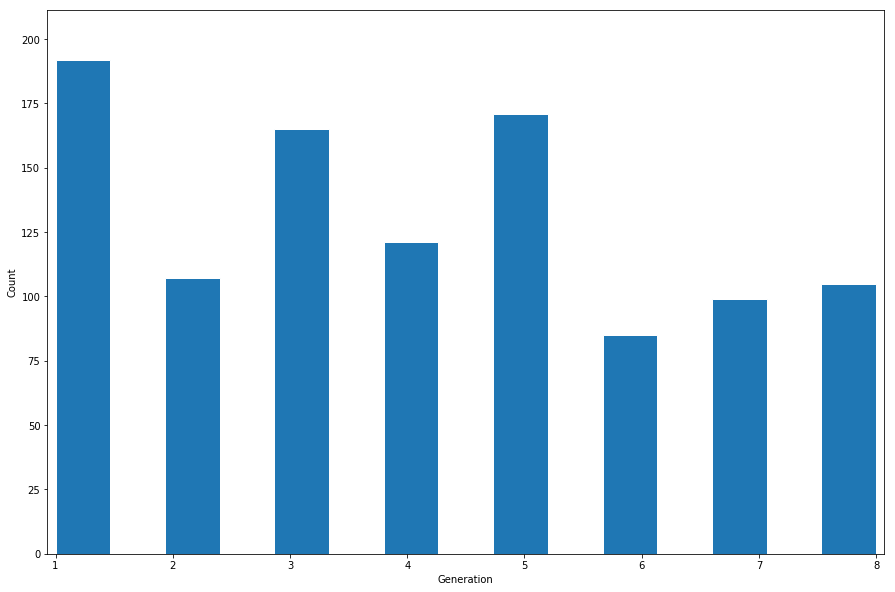

In [45]:
plt.figure(figsize=(15, 10))
n, bins, patches = plt.hist(df['generation'], edgecolor='white', bins = 15)
plt.xlabel("Generation")
plt.ylabel("Count")
plt.title = ('Generation wise Distribution')
plt.margins(x=0.01, y=0.1)
plt.show()


In [46]:
n = n[n != 0]

In [47]:
a = list(range(1, 9))

gen = pd.DataFrame(list(zip(a, n)), columns =['Generation', 'Number of Pokemons'])

gen

,Generation,Number of Pokemons
0,1,192.0
1,2,107.0
2,3,165.0
3,4,121.0
4,5,171.0
5,6,85.0
6,7,99.0
7,8,105.0


**1. Above is the required distribution**

In [48]:
Total_Points = df.sort_values(by='total_points', ascending=False)

Total_Points[['pokedex_number','name','total_points']].head(10)

,pokedex_number,name,total_points
1033,890,Eternatus Eternamax,1125
464,384,Mega Rayquaza,780
195,150,Mega Mewtwo Y,780
194,150,Mega Mewtwo X,780
460,382,Primal Kyogre,770
462,383,Primal Groudon,770
936,800,Ultra Necrozma,754
1030,889,Zamazenta Crowned Shield,720
1028,888,Zacian Crowned Sword,720
590,493,Arceus,720


**2. It appears as if Eternatus Eternamax is the most powerful PokeMon** (as far as I knew it was Arceus)

In [49]:
types = df[['type_1','type_2']]

#types.dropna(inplace=True)

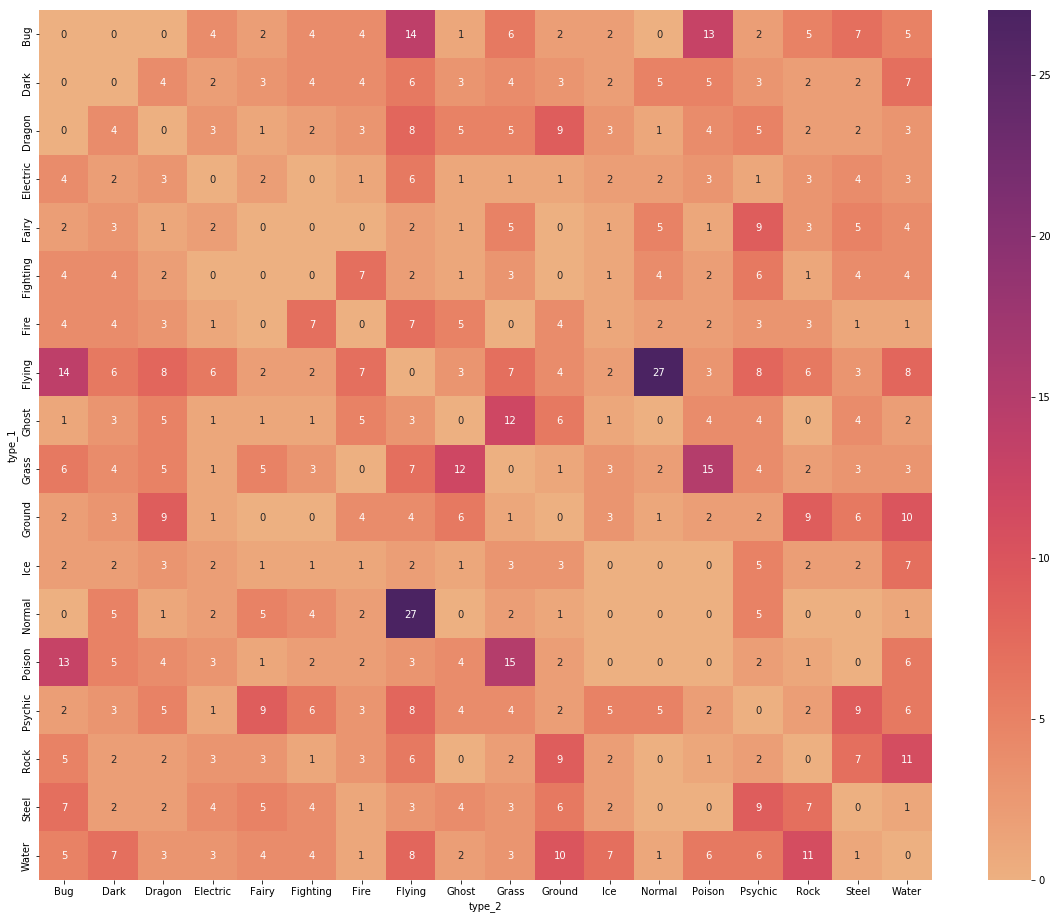

In [50]:
cross_tab_12 = pd.crosstab(df.type_1,df.type_2)
cross_tab_21 = pd.crosstab(df.type_2,df.type_1)

cross_tab = cross_tab_12.add(cross_tab_21, fill_value=0)# Assuming type_1 has equal to value to that of type_2

plt.figure(figsize = (20,16))
sns.heatmap(cross_tab, annot=True, cmap= 'flare',  fmt='d', cbar=True)

**3. It appears that the Normal-Flying Pokemon is most common dual type pokemon followed by Grass-Posion and Bug-Posion**

**4.**

In [ ]:
categories = ['attack' , 'defense' , 'sp_attack', 'sp_defense' , 'hp' , 'speed']

for category in categories:
    
    Category = df.sort_values(by=category, ascending=False)

    rank_1,r1_name,r1_points = Category[['pokedex_number','name',category]].iloc[0]
    rank_2,r2_name,r2_points = Category[['pokedex_number','name',category]].iloc[1]
    
    rank_x1,rx1_name,rx1_points = Category[['pokedex_number','name',category]].iloc[-1]
    rank_x2,rx2_name,rx2_points = Category[['pokedex_number','name',category]].iloc[-2]
    
    print(f'The PokeMon with highest points in {category} is')
    print()
    print(f'{r1_name} with {r1_points} points followed by {r2_name} with {r2_points} points')
    print(f'For the same the weakest one is {rx1_name} with {rx1_points} points preceded by {rx2_name} with {rx2_points} points')
    print()
    print()

Catch rate has a few missing rows

In [52]:
Catch_Rate = df.sort_values(by='catch_rate', ascending=False)
Catch_Rate = Catch_Rate[['pokedex_number','name','catch_rate']]
Catch_Rate.dropna(inplace=True)

rank_1,r1_name,r1_points = Catch_Rate.iloc[0]
rank_2,r2_name,r2_points = Catch_Rate.iloc[1]
    
rank_x1,rx1_name,rx1_points = Catch_Rate.iloc[-1]
rank_x2,rx2_name,rx2_points = Catch_Rate.iloc[-2]
    
print(f'The PokeMon with highest Catch Rate is')
print()
print(f'{r1_name} with {r1_points} followed by {r2_name} with {r2_points}')
print(f'For the same the ones with least catch rate is {rx1_name} with {rx1_points} preceded by {rx2_name} with {rx2_points}')

The PokeMon with highest Catch Rate is

Bronzor with 255.0 followed by Wurmple with 255.0
For the same the ones with least catch rate is Calyrex Shadow Rider with 3.0 preceded by Tapu Bulu with 3.0


****

****

# Task 4

Go through this short <a href = "https://courses.analyticsvidhya.com/courses/take/loan-prediction-practice-problem-using-python/texts/6119418-understanding-the-data">Hands-on Tutorial</a>.Try to understand how the Data is cleaned and prepared before training a model.

****

****

# **Problem 2**

# Task 1

Learn about the theory and implementation of handling Categorical Variables from <a href ="https://www.kaggle.com/code/alexisbcook/categorical-variables/tutorial">this link</a>. Try to complete <a href ="https://www.kaggle.com/code/scratchpad/notebook3191e8b423/edit">this exercise</a> to gain more clarity. Learn about the theory and implementation of various methods of Feature Selection from <a href ="https://medium.com/analytics-vidhya/descriptive-predictive-and-feature-selection-on-time-series-data-813a202312b1">this link</a>.

****

****

# Task 2

Download the <a href ="https://www.kaggle.com/datasets/goyalshalini93/car-data?resource=download">Car Datset</a> and perform EDA (handling missing values, categorical encoding, etc.). Using different Filter methods, find the most relevant features, taking car price as the dependent variable.<br>

Apply Forward feature selection for a Linear Regression model for different values of k_features. Plot a graph of different value of k_features with the corresponding accuracy and determine it's best value.

In [53]:
dataset = pd.read_csv('Data/CarPrice_Assignment.csv', header=0)

In [60]:
dataset

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859.167


In [56]:
dataset.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [57]:
data_numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
Symboling,204.0,0.823529,1.239035,-2.00,0.000,1.00,2.0000,3.00
Normalized-Losses,204.0,122.000000,31.758944,65.00,101.000,122.00,137.0000,256.00
Fuel-Type,204.0,0.901961,0.298099,0.00,1.000,1.00,1.0000,1.00
Aspiration,204.0,0.181373,0.386274,0.00,0.000,0.00,0.0000,1.00
Door-Count,204.0,3.137255,0.992973,2.00,2.000,4.00,4.0000,4.00
Drive-Wheels,204.0,0.367647,0.483351,0.00,0.000,0.00,1.0000,1.00
Engine-Location,204.0,0.014706,0.120669,0.00,0.000,0.00,0.0000,1.00
Wheel-Base,204.0,98.806373,5.994144,86.60,94.500,97.00,102.4000,120.90
Length,204.0,174.075000,12.362123,141.10,166.300,173.20,183.2000,208.10
Width,204.0,65.916667,2.146716,60.30,64.075,65.50,66.9000,72.30


It appears as if it has no missing values

****

****